In [1]:
import sklearn

import numpy as np
import os   

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

housing = pd.read_csv("datasets/housing/housing.csv")

housing_subset = housing[["longitude", "latitude", "median_income"]]

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_subset)


For k = 2, the silhouette score is 0.548
For k = 3, the silhouette score is 0.518
For k = 4, the silhouette score is 0.435
For k = 5, the silhouette score is 0.410
For k = 6, the silhouette score is 0.398
For k = 7, the silhouette score is 0.372
For k = 8, the silhouette score is 0.367
For k = 9, the silhouette score is 0.346
For k = 10, the silhouette score is 0.354


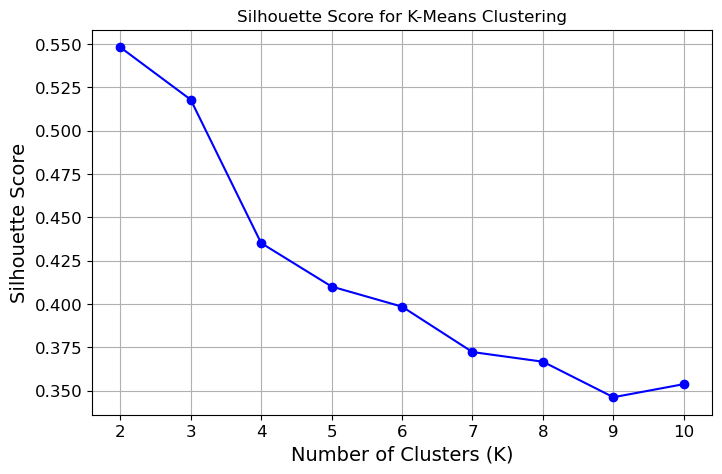

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

k_range = range(2, 11)  # we will try clusters from 2 to 10
silhouette_scores = []

# for each k, fit a KMeans model and compute the silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(housing_scaled)

    score = silhouette_score(housing_scaled, cluster_labels)
    silhouette_scores.append(score)
    print (f"For k = {k}, the silhouette score is {score:.3f}")

# visualize the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means Clustering")
plt.grid(True)
plt.show()


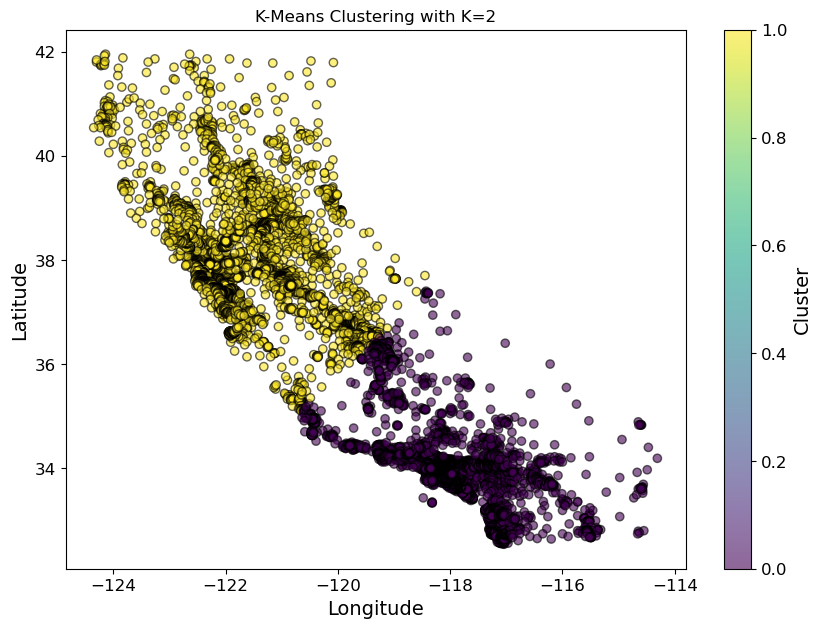

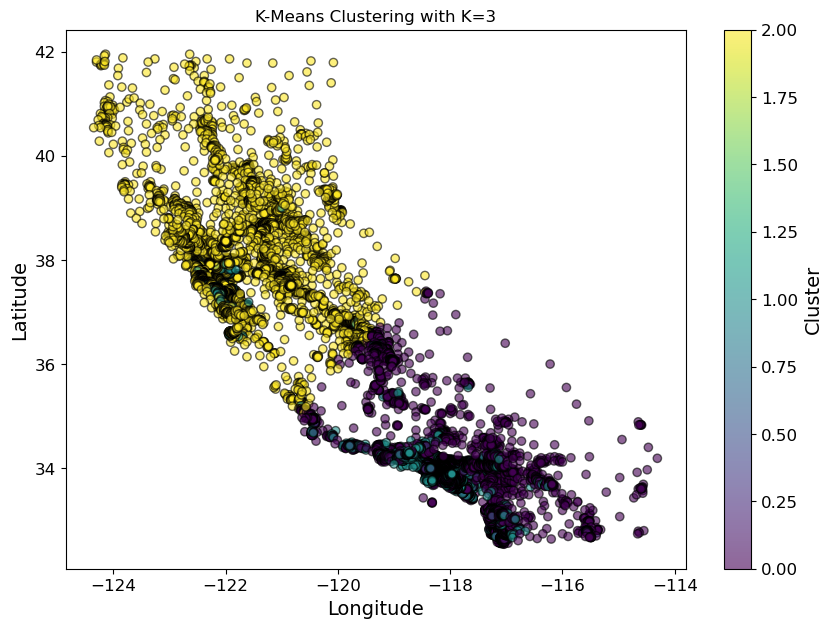

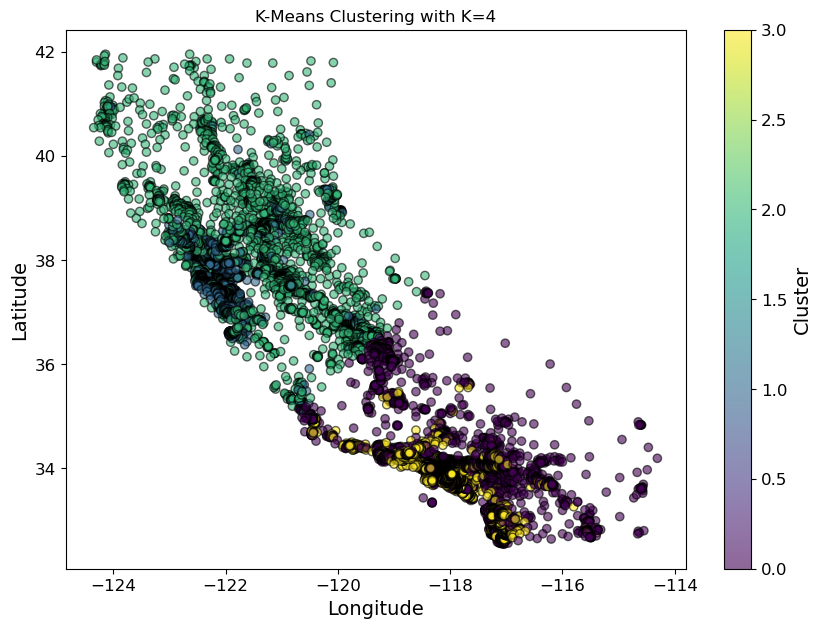

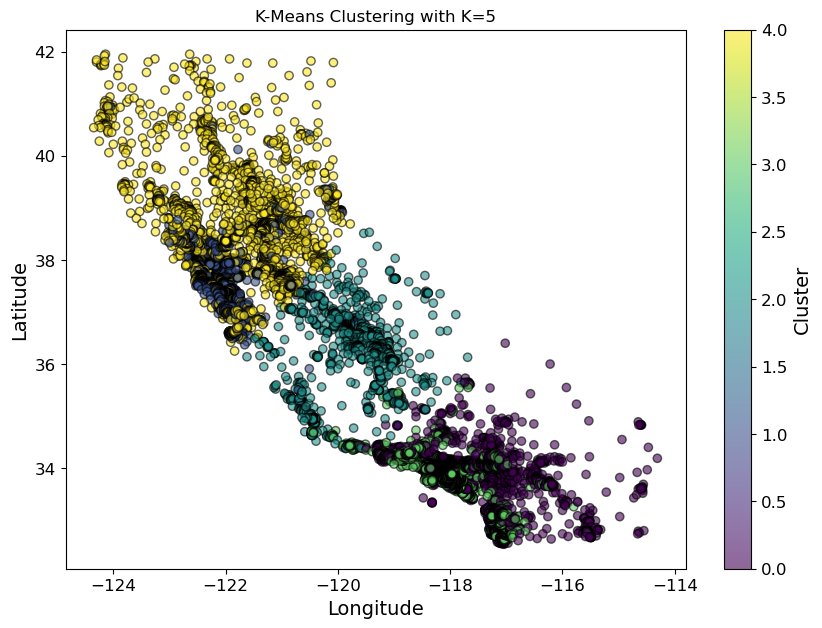

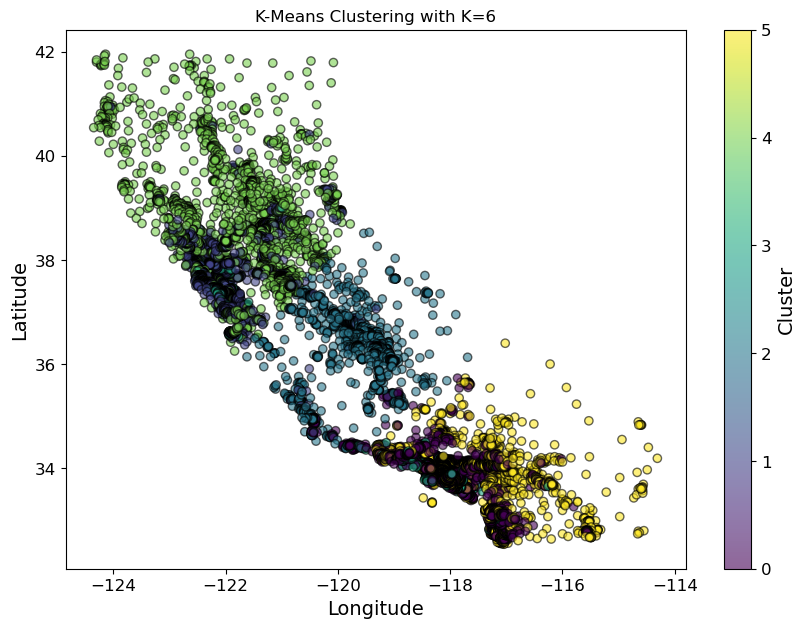

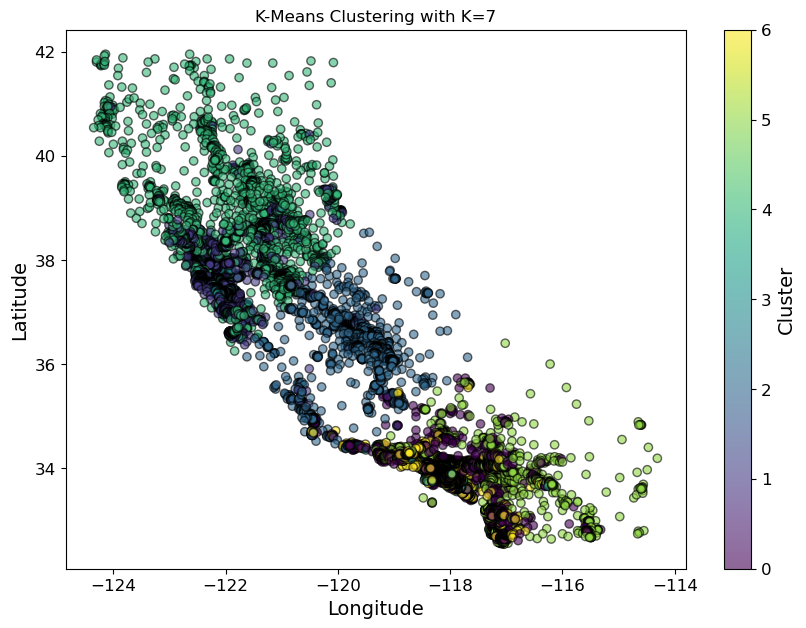

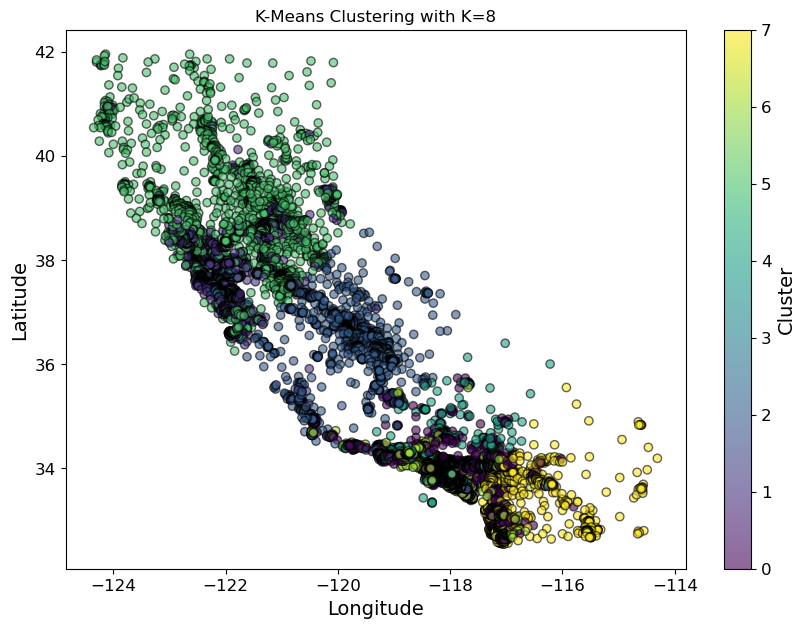

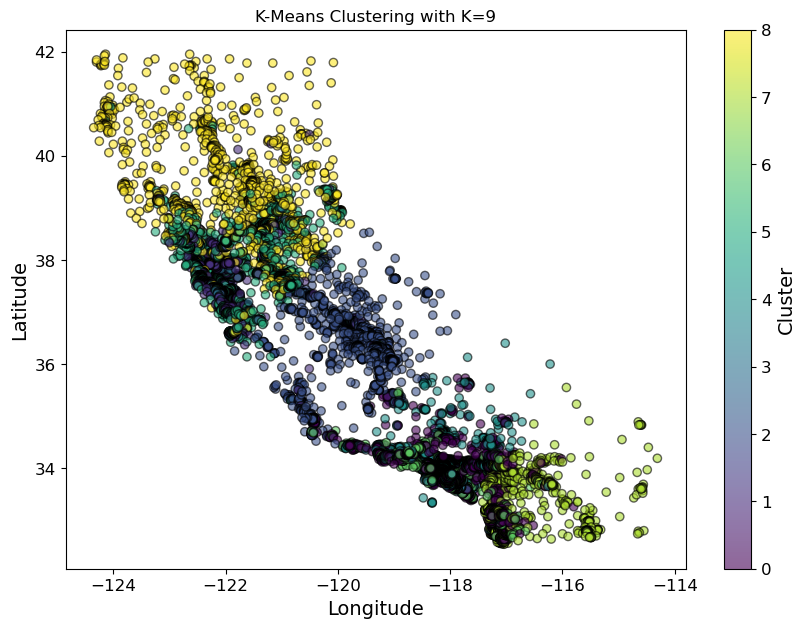

In [14]:
# lets visualize the results

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_clusters(k, data, original_data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(original_data["longitude"], original_data["latitude"], c=labels, cmap="viridis", marker="o", edgecolor="k", alpha=0.6)
    plt.title(f"K-Means Clustering with K={k}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(label='Cluster')
    plt.show()

# Visualisieren für K=2, 3, 4
for k in range(2,10):
    plot_clusters(k, housing_scaled, housing)


In [13]:
def analyze_clusters(k, data, original_data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    
    original_data.loc[:, "cluster"] = labels
    cluster_means = original_data.groupby("cluster")["median_income"].mean()
    
    print(f"Average Median Income for K={k}:")
    print(cluster_means)
    print("\n")

# Analysiere die Clusterverteilung für K=2 bis 10
for k in range(2, 11):
    analyze_clusters(k, housing_scaled, housing_subset)


Average Median Income for K=2:
cluster
0    3.922444
1    3.799659
Name: median_income, dtype: float64


Average Median Income for K=3:
cluster
0    3.250999
1    7.440986
2    3.616261
Name: median_income, dtype: float64


Average Median Income for K=4:
cluster
0    3.038855
1    6.103675
2    2.910454
3    6.407808
Name: median_income, dtype: float64


Average Median Income for K=5:
cluster
0    3.104189
1    6.193948
2    2.691494
3    6.489385
4    2.993708
Name: median_income, dtype: float64


Average Median Income for K=6:
cluster
0     5.276749
1     5.489327
2     2.620285
3    10.398594
4     2.815333
5     2.778328
Name: median_income, dtype: float64


Average Median Income for K=7:
cluster
0     4.281735
1     5.473815
2     2.606085
3    11.462768
4     2.812465
5     2.445566
6     6.656947
Name: median_income, dtype: float64


Average Median Income for K=8:
cluster
0     4.351971
1     5.488904
2     2.590454
3    11.451775
4     2.491776
5     2.818784
6     6.653246
7  

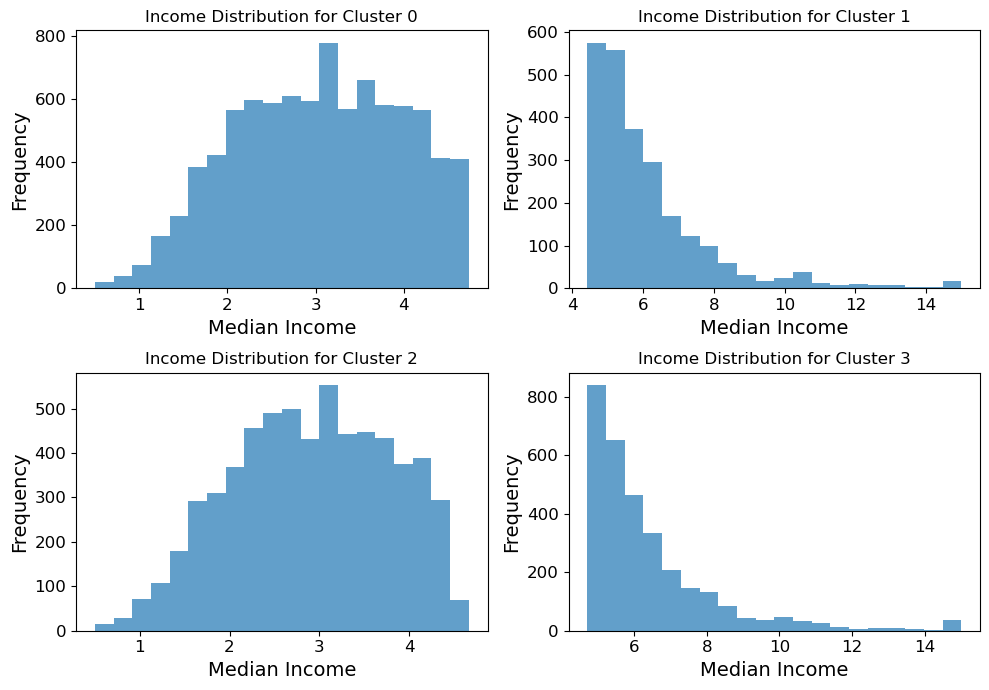

In [15]:
import matplotlib.pyplot as plt

def plot_income_distribution(k, data, original_data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    original_data["cluster"] = labels

    plt.figure(figsize=(10, 7))
    for cluster in range(k):
        plt.subplot(2, (k // 2), cluster + 1)
        plt.hist(original_data[original_data["cluster"] == cluster]["median_income"], bins=20, alpha=0.7)
        plt.title(f"Income Distribution for Cluster {cluster}")
        plt.xlabel("Median Income")
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Beispiel für k=4
plot_income_distribution(4, housing_scaled, housing)

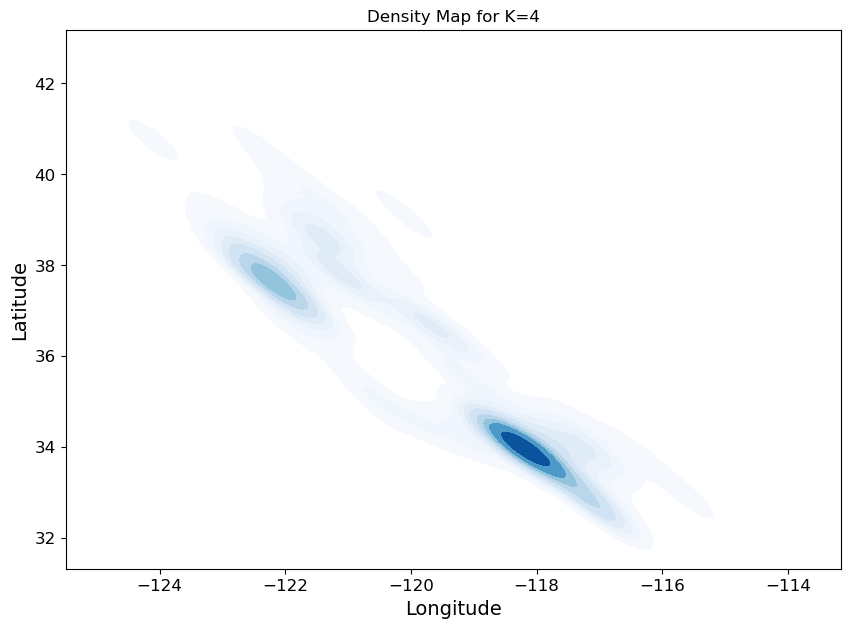

In [16]:
import seaborn as sns

def plot_density_map(k, data, original_data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    original_data["cluster"] = labels

    plt.figure(figsize=(10, 7))
    sns.kdeplot(x=original_data["longitude"], y=original_data["latitude"], cmap="Blues", fill=True)
    plt.title(f"Density Map for K={k}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Dichtekarte für k=4
plot_density_map(4, housing_scaled, housing)


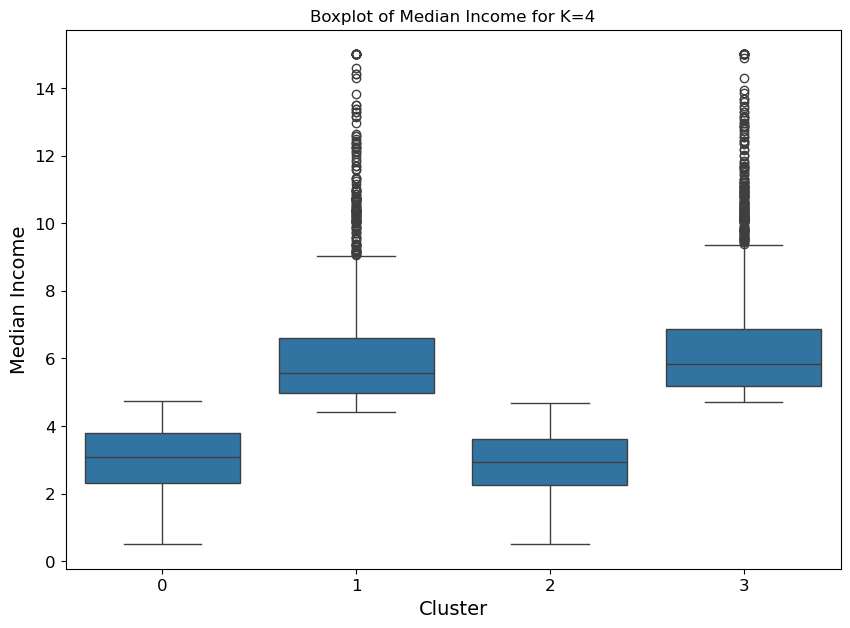

In [17]:
def plot_boxplots(k, data, original_data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    original_data["cluster"] = labels

    plt.figure(figsize=(10, 7))
    sns.boxplot(x="cluster", y="median_income", data=original_data)
    plt.title(f"Boxplot of Median Income for K={k}")
    plt.xlabel("Cluster")
    plt.ylabel("Median Income")
    plt.show()

# Boxplot für k=4
plot_boxplots(4, housing_scaled, housing)


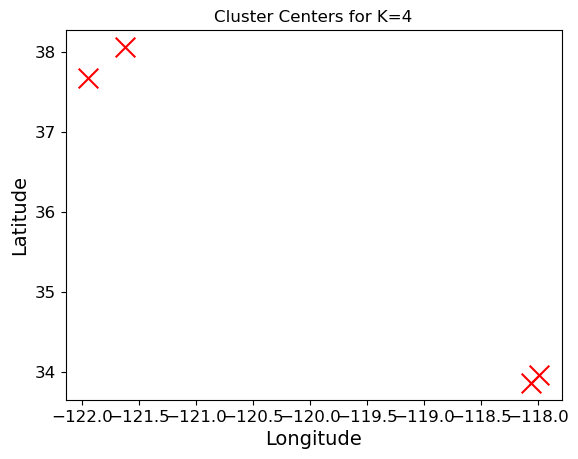

In [18]:
def plot_cluster_centers(k, data, original_data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    centers_unscaled = scaler.inverse_transform(centers)  # Zurückskalieren, um verständliche Werte zu erhalten
    
    # Plot der Clusterzentren
    plt.scatter(centers_unscaled[:, 0], centers_unscaled[:, 1], c='red', s=200, marker='x')
    plt.title(f"Cluster Centers for K={k}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Clusterzentren für k=4 plotten
plot_cluster_centers(4, housing_scaled, housing)


In [20]:
from sklearn.metrics import davies_bouldin_score

def evaluate_davies_bouldin(k, data):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    db_score = davies_bouldin_score(data, labels)
    print(f"Davies-Bouldin Index for K={k}: {db_score}")

# Davies-Bouldin Index für verschiedene K-Werte
for k in [2, 3, 4, 5, 6, 7, 8]:
    evaluate_davies_bouldin(k, housing_scaled)


Davies-Bouldin Index for K=2: 0.7097430553819086
Davies-Bouldin Index for K=3: 0.76561846247087
Davies-Bouldin Index for K=4: 0.8429060699382593
Davies-Bouldin Index for K=5: 0.8478256760656867
Davies-Bouldin Index for K=6: 0.8295874145631513
Davies-Bouldin Index for K=7: 0.8635263598500938
Davies-Bouldin Index for K=8: 0.8899021342233768
